In [1]:
import matplotlib.pyplot as plt
import numpy as np

import lsst.daf.butler as dB
import lsst.cp.verify.notebooks.utils as utils
import lsst.afw.display as afwDisplay

In [2]:
# Which calibration type to analyse.
calibType = 'dark'

# This cell should be edited to match the data to be inspected.
afwDisplay.setDefaultBackend("astrowidgets")
cameraName = 'LATISS'
verifyCollection = 'u/czw/DM-28920/verifyDark.20210707d'

/home/czw/.local/lib/python3.8/site-packages/ginga/cmap.py:13317: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  for name in _cm.cmap_d:


In [3]:
# Get butler and camera
butler = dB.Butler("/repo/main/", collections=[verifyCollection])
camera = butler.get('camera', instrument=cameraName)

In [4]:
# Get Run Statistics
runStats = butler.get('verifyDarkStats', instrument=cameraName)
runSuccess = runStats.pop('SUCCESS')

In [5]:
# IW = astrowidgets.ImageWidget(image_width=1000, image_height=1000)
display = afwDisplay.Display(dims=(1000, 1000))
display.embed()

ImageWidget(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\x…

In [7]:
calib = butler.get(calibType, instrument=cameraName, detector=0)
calibArray = calib.getImage().getArray()

In [8]:
# Get simple stats
q25, q50, q75 = np.percentile(calibArray.flatten(), [25, 50, 75])
sigma = 0.74 * (q75 - q25)
print(f"Median: {q50}   Stdev: {sigma}")

display.mtv(calib)


Median: 0.008738398551940918   Stdev: 0.056134360190480945


In [9]:
# This block allows the residual images to be scanned for concerns.
blinkResiduals = True
if blinkResiduals:
    continueDisplay = True
    skipNumber = 0
    for exposureId, stats in runStats.items():
        if skipNumber > 0:
            skipNumber -= 1
            continue
        
        # TODO: support multi-detector
        detId = 0
        residual = butler.get('verifyDarkProc', instrument=cameraName, exposure=exposureId, detector=0)
        detStats = butler.get('verifyDarkDetStats', instrument=cameraName, exposure=exposureId, detector=0)
        display.mtv(residual)
        
        continueDisplay, skipNumber = utils.interactiveBlock(f"{exposureId} {detId}", detStats)
        if continueDisplay is False:
            break

2021011900151 0 Continue? [c, q, p, #]c
2021011900152 0 Continue? [c, q, p, #]q


/home/czw/dev/DM-28920/cp_verify/python/lsst/cp/verify/notebooks/utils.py:280: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ampNames, rotation=45, rotation_mode='anchor', ha='right')


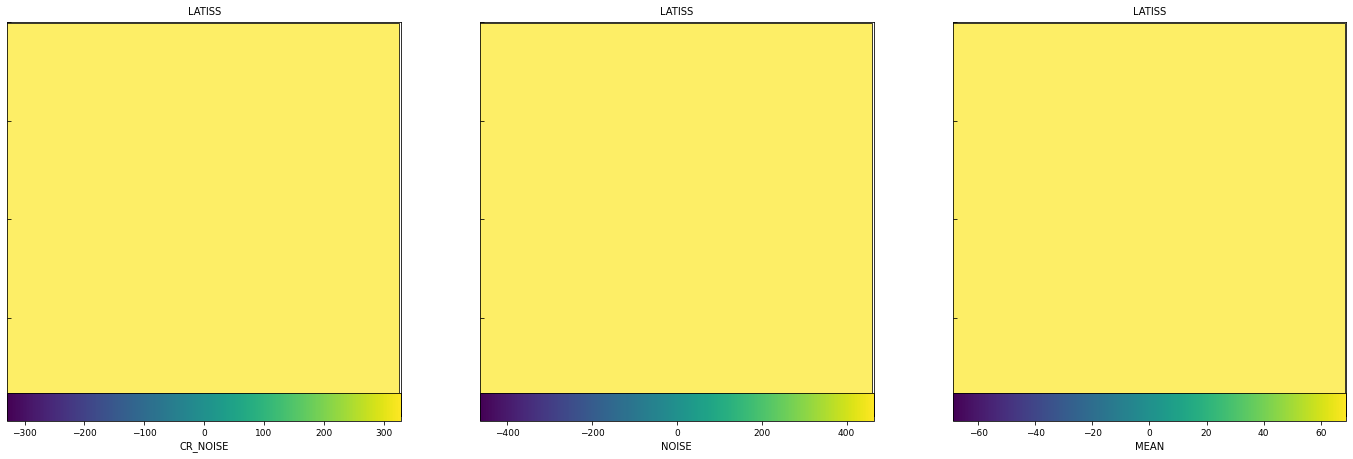

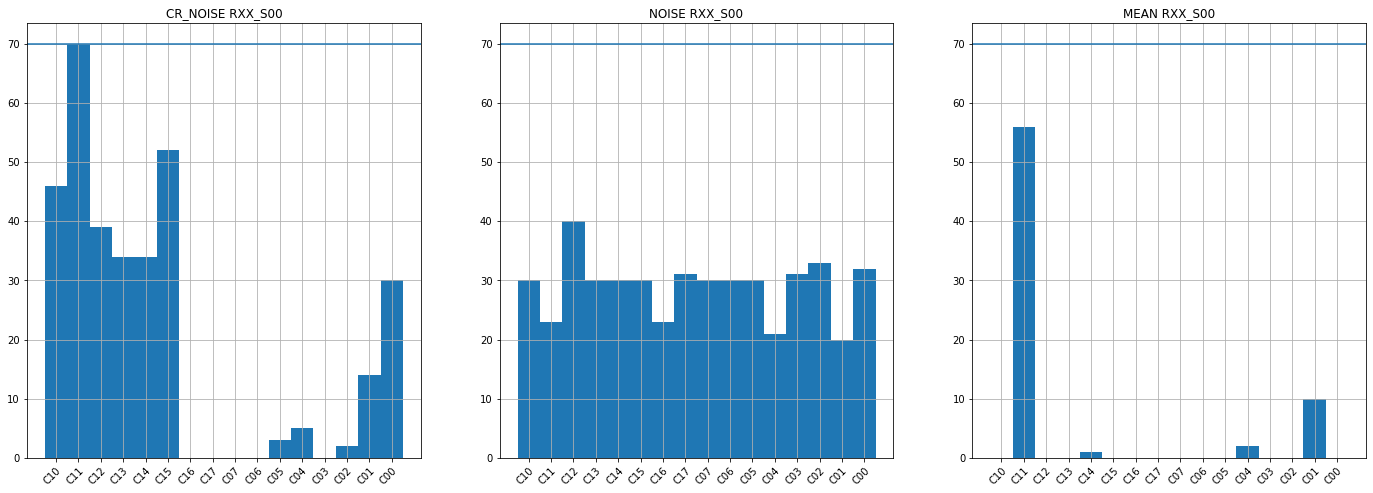

In [10]:
utils.plotFailures(runStats, camera, scaleFactor=8)

In [11]:
config = butler.get('isr_config')
config.toDict()

{'saveMetadata': True,
 'datasetType': 'raw',
 'fallbackFilterName': None,
 'useFallbackDate': False,
 'expectWcs': True,
 'fwhm': 1.0,
 'qa': {'saveStats': True,
  'flatness': {'meshX': 256,
   'meshY': 256,
   'doClip': True,
   'clipSigma': 3.0,
   'nIter': 3},
  'doWriteOss': False,
  'doThumbnailOss': False,
  'doWriteFlattened': False,
  'doThumbnailFlattened': False,
  'thumbnailBinning': 4,
  'thumbnailStdev': 3.0,
  'thumbnailRange': 5.0,
  'thumbnailQ': 20.0,
  'thumbnailSatBorder': 2},
 'doConvertIntToFloat': True,
 'doSaturation': True,
 'saturatedMaskName': 'SAT',
 'saturation': nan,
 'growSaturationFootprintSize': 1,
 'doSuspect': False,
 'suspectMaskName': 'SUSPECT',
 'numEdgeSuspect': 0,
 'edgeMaskLevel': 'DETECTOR',
 'doSetBadRegions': True,
 'badStatistic': 'MEANCLIP',
 'doOverscan': True,
 'overscan': {'fitType': 'MEDIAN_PER_ROW',
  'order': 1,
  'numSigmaClip': 3.0,
  'maskPlanes': ['SAT'],
  'overscanIsInt': True},
 'overscanFitType': 'MEDIAN',
 'overscanOrder': 1,

In [12]:
runStats

{2021011900151: {'FAILURES': ['RXX_S00 C00 CR_NOISE',
   'RXX_S00 C00 NOISE',
   'RXX_S00 C01 CR_NOISE',
   'RXX_S00 C01 NOISE',
   'RXX_S00 C02 NOISE',
   'RXX_S00 C03 NOISE',
   'RXX_S00 C04 CR_NOISE',
   'RXX_S00 C05 NOISE',
   'RXX_S00 C06 NOISE',
   'RXX_S00 C07 NOISE',
   'RXX_S00 C10 NOISE',
   'RXX_S00 C11 CR_NOISE',
   'RXX_S00 C11 MEAN',
   'RXX_S00 C11 NOISE',
   'RXX_S00 C12 CR_NOISE',
   'RXX_S00 C12 NOISE',
   'RXX_S00 C13 CR_NOISE',
   'RXX_S00 C13 NOISE',
   'RXX_S00 C14 CR_NOISE',
   'RXX_S00 C14 NOISE',
   'RXX_S00 C15 CR_NOISE',
   'RXX_S00 C15 NOISE',
   'RXX_S00 C16 NOISE',
   'RXX_S00 C17 NOISE']},
 2021011900152: {'FAILURES': ['RXX_S00 C00 CR_NOISE',
   'RXX_S00 C00 NOISE',
   'RXX_S00 C02 NOISE',
   'RXX_S00 C03 NOISE',
   'RXX_S00 C05 NOISE',
   'RXX_S00 C06 NOISE',
   'RXX_S00 C07 NOISE',
   'RXX_S00 C10 CR_NOISE',
   'RXX_S00 C10 NOISE',
   'RXX_S00 C11 CR_NOISE',
   'RXX_S00 C11 MEAN',
   'RXX_S00 C11 NOISE',
   'RXX_S00 C12 CR_NOISE',
   'RXX_S00 C12 NOISE'

In [14]:
# Get data for mean(darkTime) plot.  THIS IS A SLOW CELL.
ampMeans = {}
detector = camera[0]
for amp in detector.getAmplifiers():
    ampMeans[amp.getName()] = {'DARKTIME': [], 'MEAN': []}

for exposureId, stats in runStats.items():
    residual = butler.get('verifyDarkProc', instrument=cameraName, exposure=exposureId, detector=0)
    detStats = butler.get('verifyDarkDetStats', instrument=cameraName, exposure=exposureId, detector=0)
    darkTime = residual.getInfo().getVisitInfo().getDarkTime()
    
    for amp in detector.getAmplifiers():
        mean = detStats['AMP'][amp.getName()]['MEAN']
        ampMeans[amp.getName()]['DARKTIME'].append(darkTime)
        ampMeans[amp.getName()]['MEAN'].append(mean)

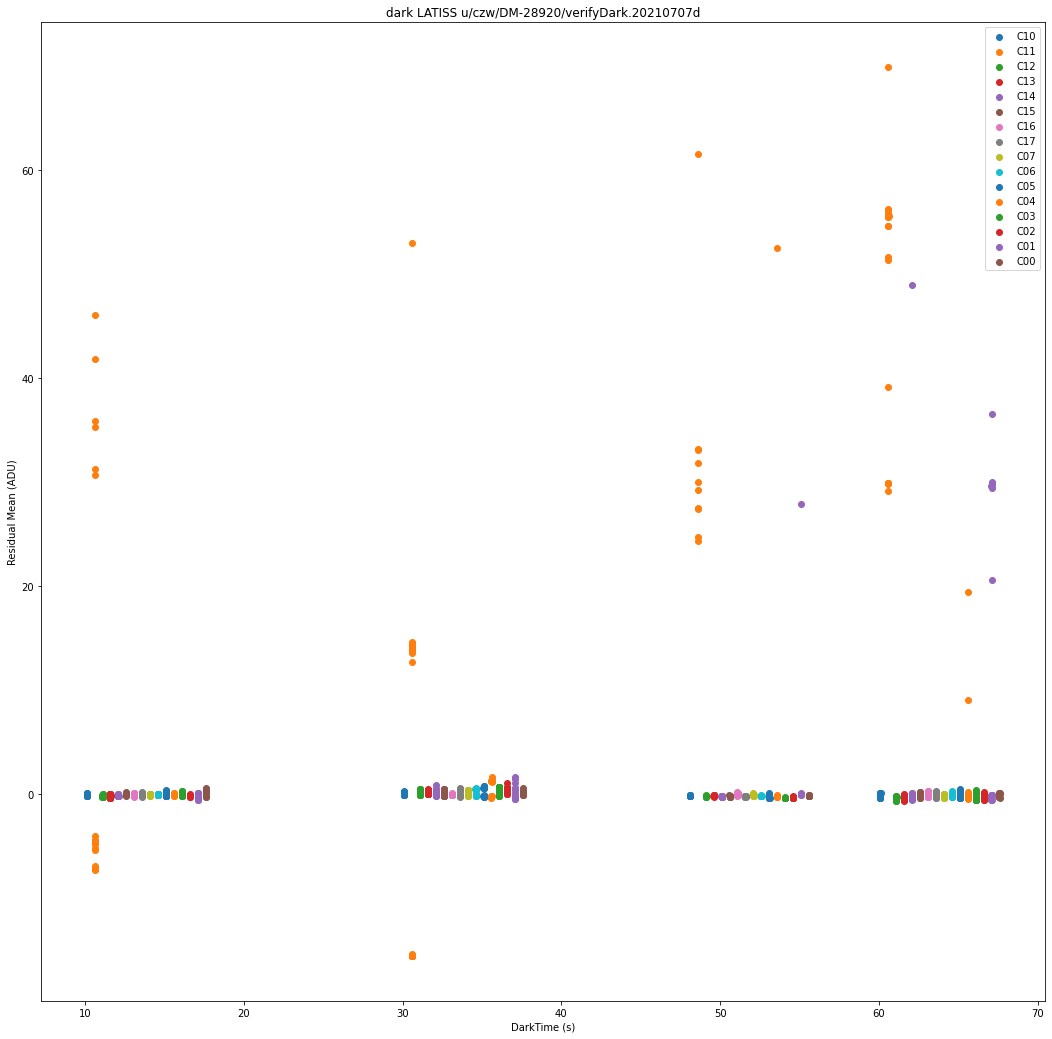

In [16]:
# plot mean as a function of exposure time, to confirm the residual is flat.
horizontalSpace = 0.5
verticalSpace = 0.0
plt.figure(figsize=(18, 18))
for spacer, amp in enumerate(detector.getAmplifiers()):
    plt.scatter(np.array(ampMeans[amp.getName()]['DARKTIME']) + horizontalSpace * spacer,
                np.array(ampMeans[amp.getName()]['MEAN']) + verticalSpace * spacer,
                label=amp.getName())
plt.xlabel("DarkTime (s)")
plt.ylabel("Residual Mean (ADU)")
plt.title(f"{calibType} {cameraName} {verifyCollection}")
plt.legend()